<a href="https://colab.research.google.com/github/Varun-2712/Covid-Data-analysis/blob/master/Linux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

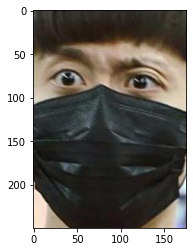

In [172]:
img1=cv2.imread("sample_data/1.png")
img1.shape
data="sample_data/"
classes=["with_mask","without_mask"]
for i in classes:
  path=os.path.join(data,i)
  for img in os.listdir(path):
    img_arr=cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break


In [ ]:
train=[]
def training():
  for i in classes:
    path=os.path.join(data,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        new_arr=cv2.resize(img_arr,(224,224))
        train.append([new_arr,class_num])
      except Exception as e:
        pass
training()

In [ ]:
print(len(train))

855


In [ ]:
import random
random.shuffle(train)

In [ ]:
x=[]
y=[]
for i,j in train:
  x.append(i)
  y.append(j)
x=np.array(x).reshape(-1,224,224,3)
x.shape
x=x/255
y=np.array(y)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model=keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [ ]:
base_input=model.layers[0].input
base_output=model.layers[-4].output


In [ ]:
flat=layers.Flatten()(base_output)
final=layers.Dense(1)(flat)
output=layers.Activation('sigmoid')(final)


In [ ]:
new_model=keras.Model(inputs=base_input,outputs=output)


In [ ]:
new_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [ ]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
new_model.fit(x,y,epochs=1,validation_split=0.1)

25/25 [==============================] - 157s 6s/step - loss: 0.2109 - accuracy: 0.9402 - val_loss: 1.1927 - val_accuracy: 0.8256


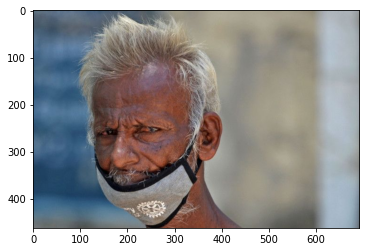

In [176]:
img_arr=cv2.imread('test10.jpg')
plt.imshow(cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB))


In [177]:
final=cv2.resize(img_arr,(224,224))
final=np.expand_dims(final,axis=0)
final=final/255

In [178]:
ans=new_model.predict(final)
print(ans)
if ans  < 1:
  print("Wearing mask")
else :
  print("Not wearing mask")

[[1.]]
Not wearing mask


# New Section